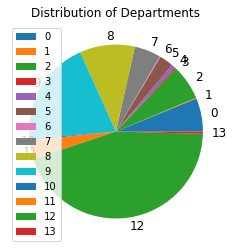

In [45]:
import pandas as pd
df = pd.read_csv("./preprocess/carrefour_v1_department.csv")
df = df.drop(columns = "Unnamed: 0")

toplot=[]

for i in range (14):
    obj = str(i)+'_count'
    counts = df[obj].sum()
    toplot.append(counts)

import matplotlib.pyplot as plt
#plt.pie(toplot)
plt.pie(toplot,                             # 標籤           # 設定分隔的區塊位置
        pctdistance = 0.6,  
        labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],# 數字距圓心的距離
        textprops = {"fontsize" : 12},
        center=(10,10),# 文字大小
       radius=1)    
plt.legend()
plt.title('Distribution of Departments')
plt.show()

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,accuracy_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import time

time1=time.time()

df = pd.read_csv("carrefour_v1_department.csv")
df = df.drop(columns = "Unnamed: 0")
features = df.iloc[:,0:17]
target = df.iloc[:,17:32]

X_train,X_test, y_train, y_test =train_test_split(features,target,test_size=0.3,random_state=1)

#model=DecisionTreeClassifier(max_depth=4,random_state=1)
model=RandomForestClassifier(n_estimators = 100,random_state=1)

model.fit(X_train, y_train)
ypredict=model.predict(X_test)

y_test=y_test.values.tolist()

for i, j in zip(ypredict,y_test):
    print(accuracy_score(i,j))
    print(precision_score(i,j))



0.8
0.5
0.7333333333333333
0.0
0.7333333333333333
0.3333333333333333


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.27, .56, .17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.33, .54, .07, .06]
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Age of approvers')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()